# Kidney Disease

## Imports

In [69]:
import sys
import os

# Add the directory `src` containing python code
sys.path.append(os.path.abspath('../src'))

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from dea_proccessing import get_df_info, label_encode_categorical_columns, one_shot_encode_categorical_columns, filtered_df
from graph_func import gender_boxplot_graph

In [71]:
import numpy as np
import pandas as pd

In [72]:
kidney_df = pd.read_csv("../data/Chronic_Kidney_Disease_data.csv")
kidney_df.drop(columns=["DoctorInCharge"], inplace=True)
kidney_df.head(5)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1


## information

In [73]:
get_df_info(kidney_df)

Shape:  (1659, 53) 

Columns:  ['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiterac

### Visualize data 

#### Calculate the correlation matrix

In [74]:
kidney_df_corr_matrix = kidney_df.corr()
# high_corr_matrix = kidney_df_corr_matrix["Diagnosis"].sort_values(ascending=True).index.to_list()[30:]

high_corr_matrix = kidney_df_corr_matrix["Diagnosis"].round(2).sort_values()[kidney_df_corr_matrix["Diagnosis"].round(2).sort_values() >= 0].index.to_list()

low_corr_matrix = kidney_df_corr_matrix["Diagnosis"].sort_values(ascending=True).index.to_list()[:30]


In [75]:
kidney_df_corr_matrix

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
PatientID,1.000000,0.001166,-0.023822,-0.016970,0.025289,0.029565,-0.036264,-0.005863,0.029087,-0.003768,...,0.003806,-0.042814,-0.011147,-0.028480,0.002591,0.028288,-0.018654,0.001955,0.004524,-0.171405
Age,0.001166,1.000000,-0.037765,-0.006307,0.001448,0.008947,-0.033202,0.020215,-0.006030,0.003485,...,0.001318,0.005683,-0.022676,0.043746,-0.014711,-0.038522,-0.015165,0.043168,0.010920,0.000919
Gender,-0.023822,-0.037765,1.000000,0.025707,0.004767,-0.022095,-0.023381,0.004054,-0.020473,0.014840,...,-0.028158,0.001424,0.015554,0.013984,-0.000509,0.019628,0.020156,-0.026356,-0.014644,0.042239
Ethnicity,-0.016970,-0.006307,0.025707,1.000000,-0.047051,0.039696,-0.008506,0.019127,-0.033574,-0.057811,...,-0.004542,-0.031039,0.010930,0.008654,0.010036,-0.036629,0.023191,0.007489,0.012971,0.007199
SocioeconomicStatus,0.025289,0.001448,0.004767,-0.047051,1.000000,-0.003711,-0.030242,0.021900,0.010864,-0.000259,...,-0.026640,-0.003762,-0.007924,0.036443,-0.013242,-0.005283,0.002820,0.009689,-0.022453,-0.034104
EducationLevel,0.029565,0.008947,-0.022095,0.039696,-0.003711,1.000000,-0.016669,0.003070,0.046814,-0.003066,...,0.018786,0.004209,-0.016503,-0.047143,0.020611,-0.029415,0.022940,-0.005434,-0.000944,-0.037343
BMI,-0.036264,-0.033202,-0.023381,-0.008506,-0.030242,-0.016669,1.000000,-0.000968,-0.067239,0.003528,...,-0.030355,0.023998,-0.046046,-0.032956,0.008763,0.006205,0.002934,0.020329,-0.015661,0.055222
Smoking,-0.005863,0.020215,0.004054,0.019127,0.021900,0.003070,-0.000968,1.000000,0.032707,0.006153,...,0.057832,-0.006464,0.017025,-0.015402,-0.009121,0.000686,0.033114,-0.043634,0.028563,0.026875
AlcoholConsumption,0.029087,-0.006030,-0.020473,-0.033574,0.010864,0.046814,-0.067239,0.032707,1.000000,0.056835,...,-0.008730,0.018152,0.000959,-0.026421,0.030144,0.027446,0.022099,0.011002,-0.012806,-0.006245
PhysicalActivity,-0.003768,0.003485,0.014840,-0.057811,-0.000259,-0.003066,0.003528,0.006153,0.056835,1.000000,...,0.035289,-0.011907,0.006563,-0.001012,0.001602,-0.003056,-0.017973,0.059385,0.007185,-0.021550


##### Heatmap

In [76]:
columns_lst = ["Diagnosis","NauseaVomiting", "Smoking","DietQuality", "HbA1c", "ProteinInUrine",
               "HealthLiteracy", "MedicationAdherence", "AlcoholConsumption", "SleepQuality","SerumCreatinine", "ACR",
               "MedicalCheckupsFrequency", "QualityOfLifeScore","BMI", "SystolicBP", "BUNLevels",
               "PhysicalActivity", "DiastolicBP", "FastingBloodSugar", "GFR", "Age"
              ]

In [77]:
filtered_df(kidney_df ).T

,0,1,2,3,4,5,6,7,8,9,...,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658
PatientID,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,1650.000000,1651.000000,1652.000000,1653.000000,1654.000000,1655.000000,1656.000000,1657.000000,1658.000000,1659.000000
Age,71.000000,34.000000,80.000000,40.000000,43.000000,22.000000,41.000000,72.000000,21.000000,49.000000,...,89.000000,32.000000,42.000000,20.000000,73.000000,90.000000,34.000000,84.000000,90.000000,34.000000
Gender,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Ethnicity,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
SocioeconomicStatus,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000
EducationLevel,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,2.000000,1.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,2.000000,0.000000
BMI,31.069414,29.692119,37.394822,31.329680,23.726311,39.155643,35.040487,30.760440,22.323130,24.338507,...,22.859626,35.253136,21.653960,20.378015,35.634449,39.677059,28.922015,21.951219,24.964149,19.253258
Smoking,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
AlcoholConsumption,5.128112,18.609552,11.882429,16.020165,7.944146,4.243608,18.224708,18.662717,9.951503,0.129900,...,12.654568,4.841773,8.735558,14.809062,8.929558,1.370151,3.372073,15.825955,12.967462,11.396510
PhysicalActivity,1.676220,8.377574,9.607401,0.408871,0.780319,8.847245,8.155523,6.179345,9.449652,6.464306,...,2.130131,1.037494,3.434101,7.459221,6.260773,4.157954,9.647525,7.349964,0.618614,7.446314


In [78]:
kidney_df[columns_lst]

,Diagnosis,NauseaVomiting,Smoking,DietQuality,HbA1c,ProteinInUrine,HealthLiteracy,MedicationAdherence,AlcoholConsumption,SleepQuality,...,MedicalCheckupsFrequency,QualityOfLifeScore,BMI,SystolicBP,BUNLevels,PhysicalActivity,DiastolicBP,FastingBloodSugar,GFR,Age
0,1,6.992244,1,0.240386,9.212397,0.744980,9.871449,4.966808,5.128112,4.076434,...,1.018824,76.076800,31.069414,113,25.605949,1.676220,83,72.510788,45.703204,71
1,1,0.356290,1,6.503233,4.604989,3.052317,7.161765,8.189275,18.609552,7.652813,...,3.923538,40.128498,29.692119,120,31.338166,8.377574,67,100.848875,55.784504,34
2,1,4.674069,1,2.104828,5.432599,1.157839,7.354632,7.624028,11.882429,4.392786,...,1.429906,92.872842,37.394822,147,39.738169,9.607401,106,160.989441,67.559032,80
3,1,5.691455,0,6.964422,4.144466,3.745871,6.629587,3.282688,16.020165,6.282274,...,3.226416,90.080321,31.329680,117,21.980958,0.408871,65,188.506620,33.202542,40
4,1,2.273459,0,3.097796,4.262979,2.570993,1.437385,3.849498,7.944146,4.021639,...,0.285466,5.258372,23.726311,98,12.216366,0.780319,66,82.156699,56.319082,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,0,1.541242,1,8.602873,7.309465,2.926489,2.046212,9.547583,1.370151,5.239288,...,0.951836,81.102765,39.677059,130,23.207131,4.157954,89,195.433613,80.644448,90
1655,0,4.224176,0,9.836919,4.357399,3.496617,0.324417,1.609847,3.372073,6.401662,...,3.604147,10.600428,28.922015,127,27.145254,9.647525,103,73.606489,118.026779,34
1656,0,6.061171,0,5.038194,8.235078,3.549633,4.935108,5.768617,15.825955,8.440859,...,0.801955,69.633427,21.951219,118,29.733737,7.349964,102,163.084321,19.283249,84
1657,1,4.151696,0,4.557577,6.298927,3.816679,0.322592,2.744519,12.967462,5.527100,...,0.560298,31.858023,24.964149,163,15.773740,0.618614,87,98.794331,68.770181,90


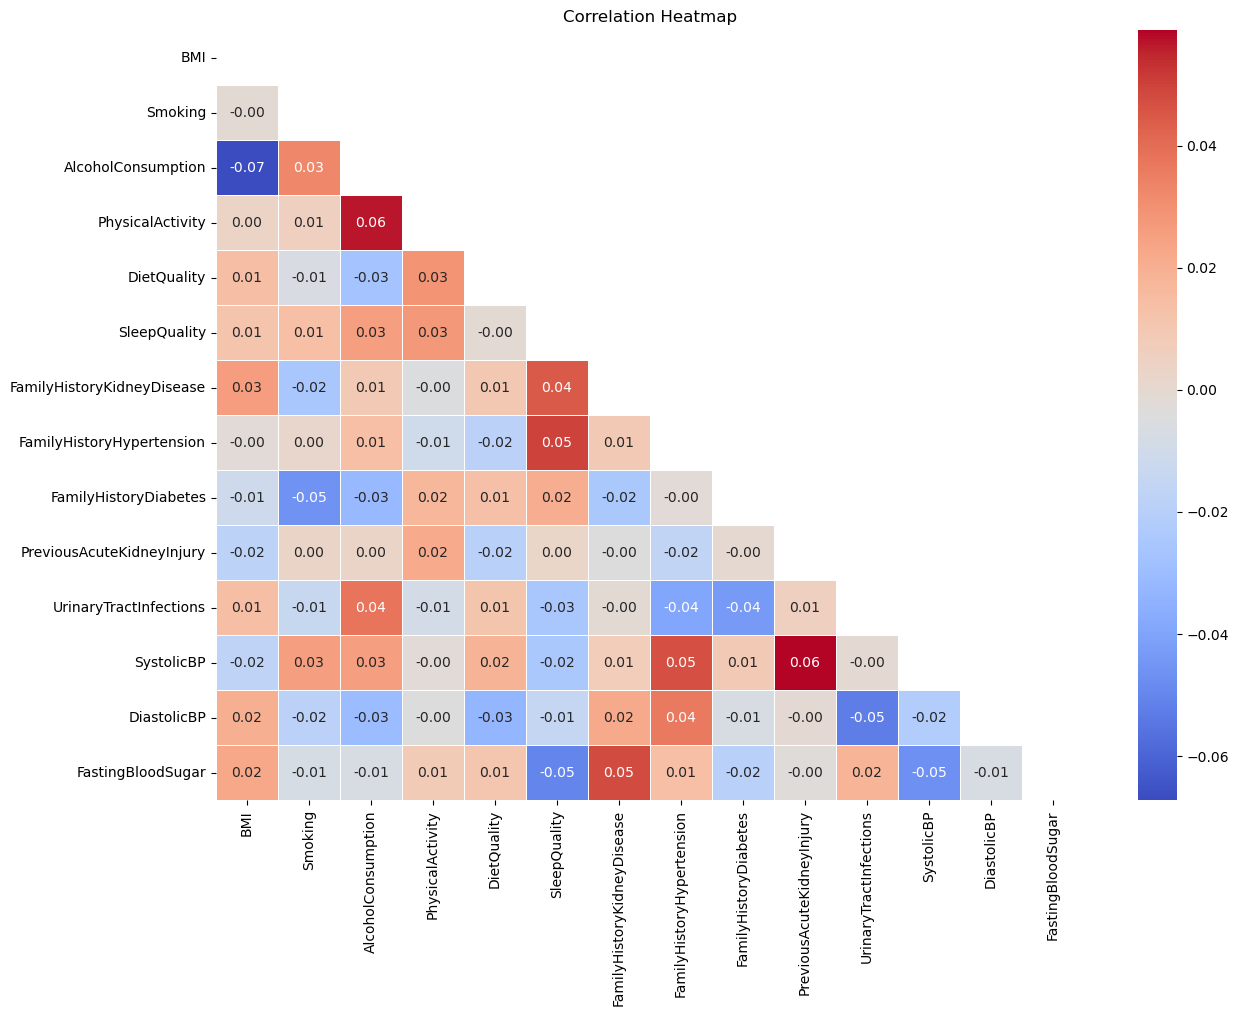

In [79]:
plt.figure(figsize=(14, 10))
# Create a mask for the upper triangle
matrix = np.triu(filtered_df(kidney_df,columns=kidney_df.columns.to_list()[6:20] ).corr())
sns.heatmap(filtered_df(kidney_df, columns=kidney_df.columns.to_list()[6:20] ).corr(),mask=matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### Corr matrix heatmap

#### High Correlation Heatmap

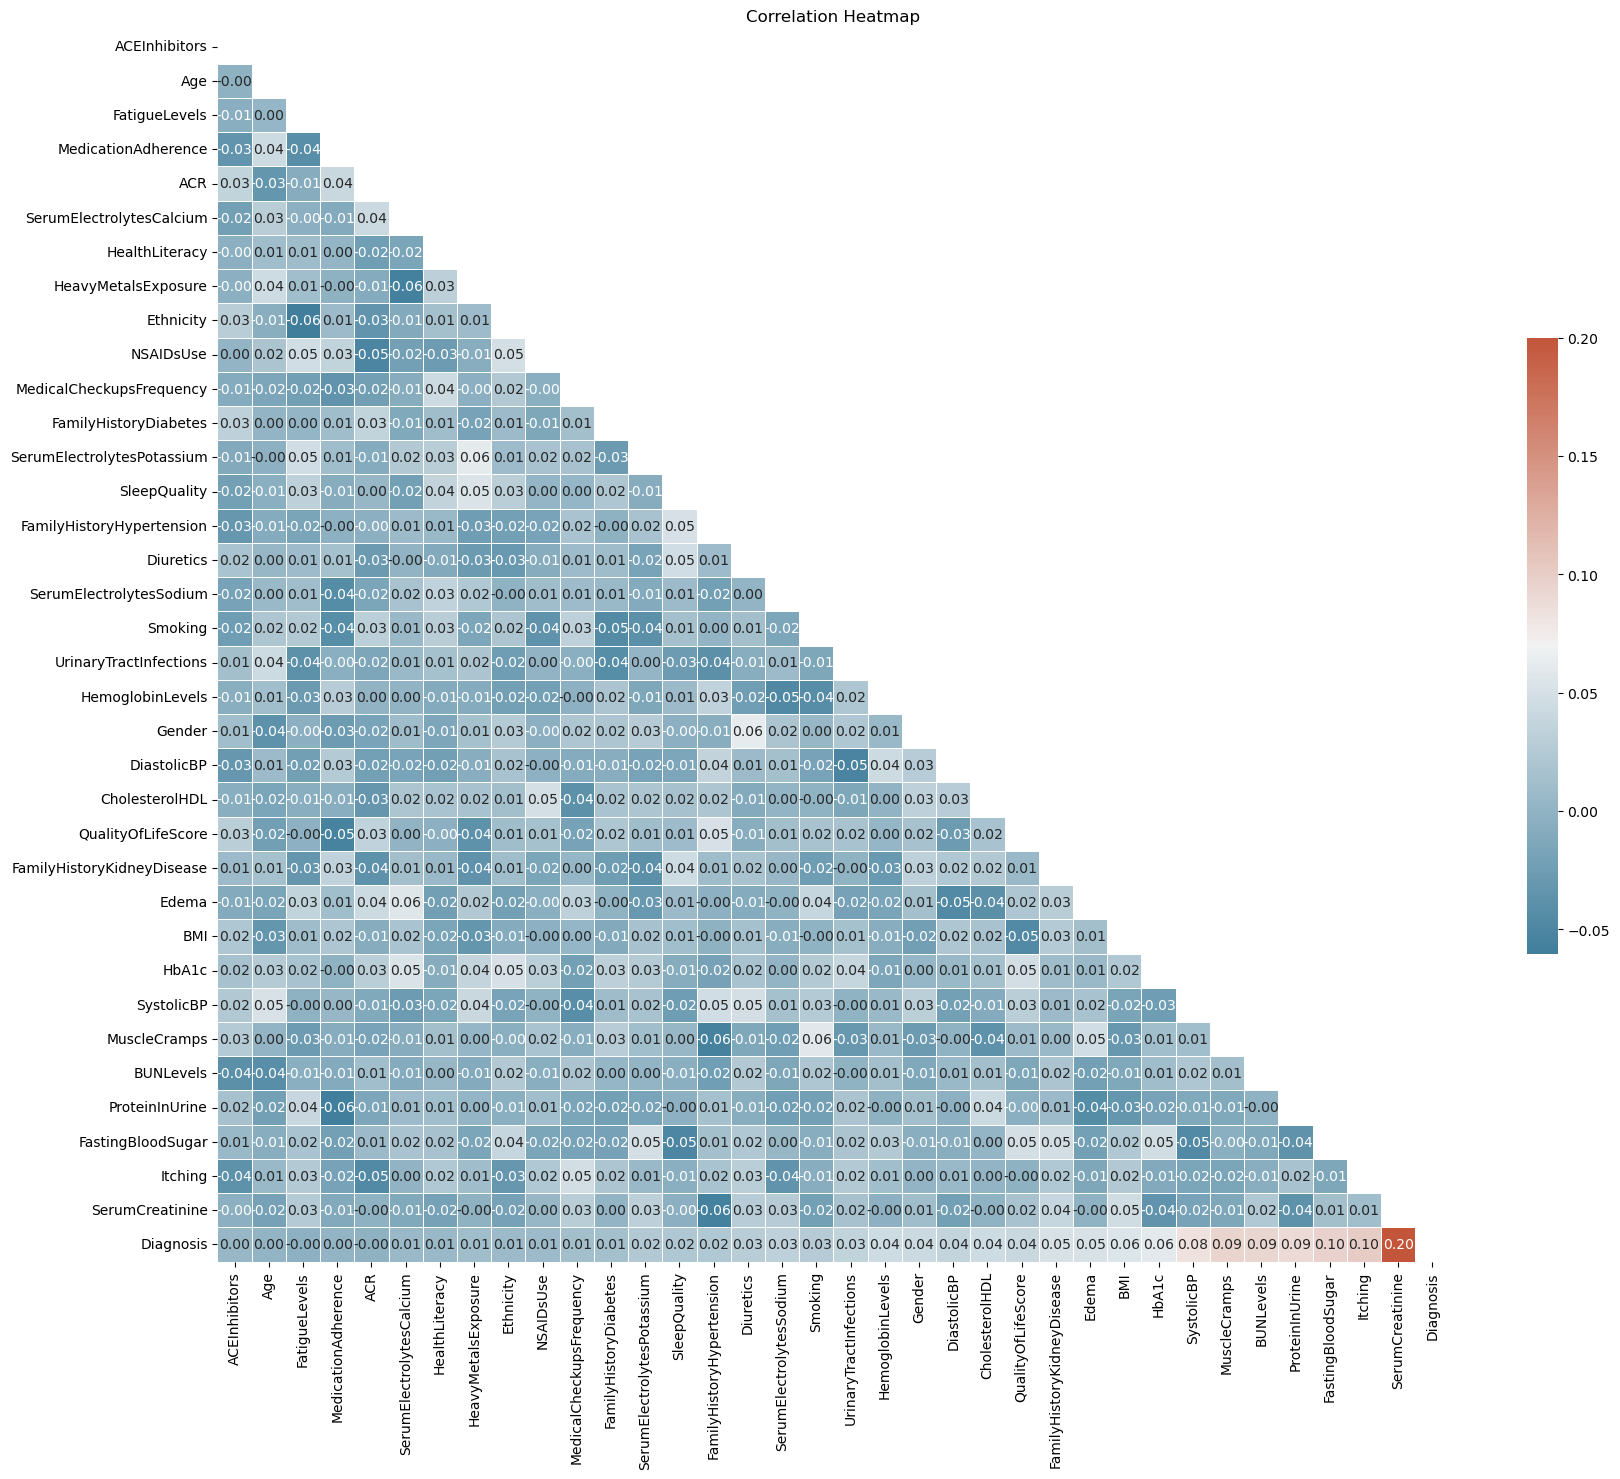

In [80]:
# plt.figure()

ax: Axes
fig, ax = plt.subplots(figsize=(20,16))


# Create a mask for the upper triangle
matrix = np.triu(filtered_df(kidney_df,columns=high_corr_matrix ).corr())

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(filtered_df(kidney_df, columns=high_corr_matrix ).corr()[high_corr_matrix],mask=matrix, annot=True, cmap=cmap ,fmt=".2f",
            square=True, vmax=0.2 ,linewidths=0.5, cbar_kws={"shrink": .5})
# sns.heatmap(filtered_df(kidney_df, columns=high_corr_matrix ).corr(),mask=matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [81]:
kidney_df.sample(10)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
120,121,78,0,3,0,3,22.620954,0,12.077560,9.607378,...,2.087297,5.417583,39.101040,0,1,1,2.878028,0.672445,3.271624,1
1339,1340,83,1,0,0,3,28.563697,1,13.677679,8.857475,...,4.900146,5.935826,49.643598,0,0,0,0.991044,2.614326,0.145303,1
819,820,59,0,0,1,2,15.451505,0,6.599386,2.743824,...,2.737851,6.416531,99.522893,0,0,0,2.734019,3.690325,7.863742,1
1102,1103,62,1,0,1,1,29.441536,0,7.678784,5.558711,...,5.401385,9.030431,86.284332,0,0,1,2.463387,2.328945,1.483512,1
1364,1365,41,1,0,1,3,24.870019,0,8.026719,5.432780,...,2.896274,4.822850,46.216849,0,1,0,2.375373,2.650453,6.988048,1
1094,1095,39,1,0,0,3,22.287103,0,7.642297,8.958439,...,5.322393,9.628374,74.638810,0,1,1,3.834551,2.298188,6.804342,1
186,187,86,1,2,2,2,17.377341,0,0.371167,0.858423,...,3.147338,2.354221,46.189316,0,0,0,2.872203,1.411061,8.814236,1
239,240,36,1,0,0,2,18.715830,0,9.864870,4.032305,...,5.024984,9.005749,39.937892,0,0,0,0.789184,2.811049,8.768520,1
246,247,70,1,0,0,0,22.310377,0,10.215841,0.714012,...,2.302251,2.175258,99.190149,1,0,0,1.073138,4.719673,8.075910,1
804,805,41,0,0,1,3,33.705843,0,13.661603,2.718459,...,4.275435,8.064563,63.101551,0,0,1,2.424193,7.808157,0.303651,1


In [82]:
kidney_df[kidney_df["Diagnosis"] == 0]["SerumCreatinine"].describe()

count    135.000000
mean       1.863380
std        1.312844
min        0.501799
25%        0.907932
50%        1.276363
75%        2.761998
max        4.989844
Name: SerumCreatinine, dtype: float64

In [83]:
kidney_df[kidney_df["Diagnosis"] == 1]["SerumCreatinine"].describe()

count    1524.000000
mean        2.832020
std         1.288670
min         0.506592
25%         1.749394
50%         2.836562
75%         3.954012
max         4.998637
Name: SerumCreatinine, dtype: float64

In [84]:
kidney_df["SerumCreatinine"].unique().size/100

16.59

In [85]:
post_kidney_df = kidney_df[kidney_df["Diagnosis"] == 1]
post_age_kidney_df = post_kidney_df.groupby("Age").mean()
post_creatine_kidney_df = post_kidney_df.groupby("SerumCreatinine").mean()

In [86]:
post_creatine_kidney_df.T

SerumCreatinine,0.506592,0.519558,0.525303,0.530333,0.532074,0.534061,0.535823,0.540503,0.542675,0.546148,...,4.972072,4.973084,4.977829,4.982332,4.988301,4.988408,4.992717,4.993008,4.994026,4.998637
PatientID,18.000000,956.000000,376.000000,324.000000,766.000000,1366.000000,1083.000000,1537.000000,273.000000,1383.000000,...,1064.000000,1371.000000,751.000000,361.000000,490.000000,215.000000,1100.000000,1023.000000,570.000000,357.000000
Age,41.000000,32.000000,88.000000,77.000000,66.000000,46.000000,30.000000,88.000000,79.000000,54.000000,...,90.000000,78.000000,81.000000,35.000000,84.000000,22.000000,36.000000,30.000000,75.000000,20.000000
Gender,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
Ethnicity,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,2.000000,0.000000
SocioeconomicStatus,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,...,0.000000,2.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000
EducationLevel,3.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,3.000000,1.000000,3.000000,...,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000
BMI,26.046226,24.768825,25.379090,16.264921,23.194280,38.833107,22.344047,29.585550,23.550567,27.492642,...,37.303823,38.278011,17.556607,35.297728,30.961377,37.093335,33.656359,24.535384,29.370976,34.475135
Smoking,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
AlcoholConsumption,9.774625,11.877436,2.614530,19.385109,17.659510,0.566487,17.702386,15.574763,4.211584,8.117755,...,8.321018,2.065869,0.349363,8.231115,1.438927,10.144079,0.317868,13.983549,3.988807,1.851109
PhysicalActivity,3.389831,2.776125,6.840709,6.255564,7.527929,5.773116,8.542203,3.019819,6.259002,2.841780,...,1.834163,1.044224,8.116839,3.220322,3.633472,0.253377,5.884862,6.381551,5.229583,4.790237


### Creatine levels by Age

In [87]:
post_age_kidney_df.index

Index([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
      dtype='int64', name='Age')

In [88]:
male_kidney_df = kidney_df[kidney_df["Gender"] == 0 ]
female_kidney_df = kidney_df[kidney_df["Gender"] == 1 ]

male_kidney_df

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1
5,6,22,0,0,0,1,39.155643,0,4.243608,8.847245,...,3.344124,8.685695,12.794110,0,0,0,0.358613,5.766704,2.066944,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1652,1653,20,0,0,1,3,20.378015,1,14.809062,7.459221,...,5.297866,5.813276,63.415192,0,1,0,0.447521,0.448998,9.833712,1
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0


#### Serum Creatine level by age

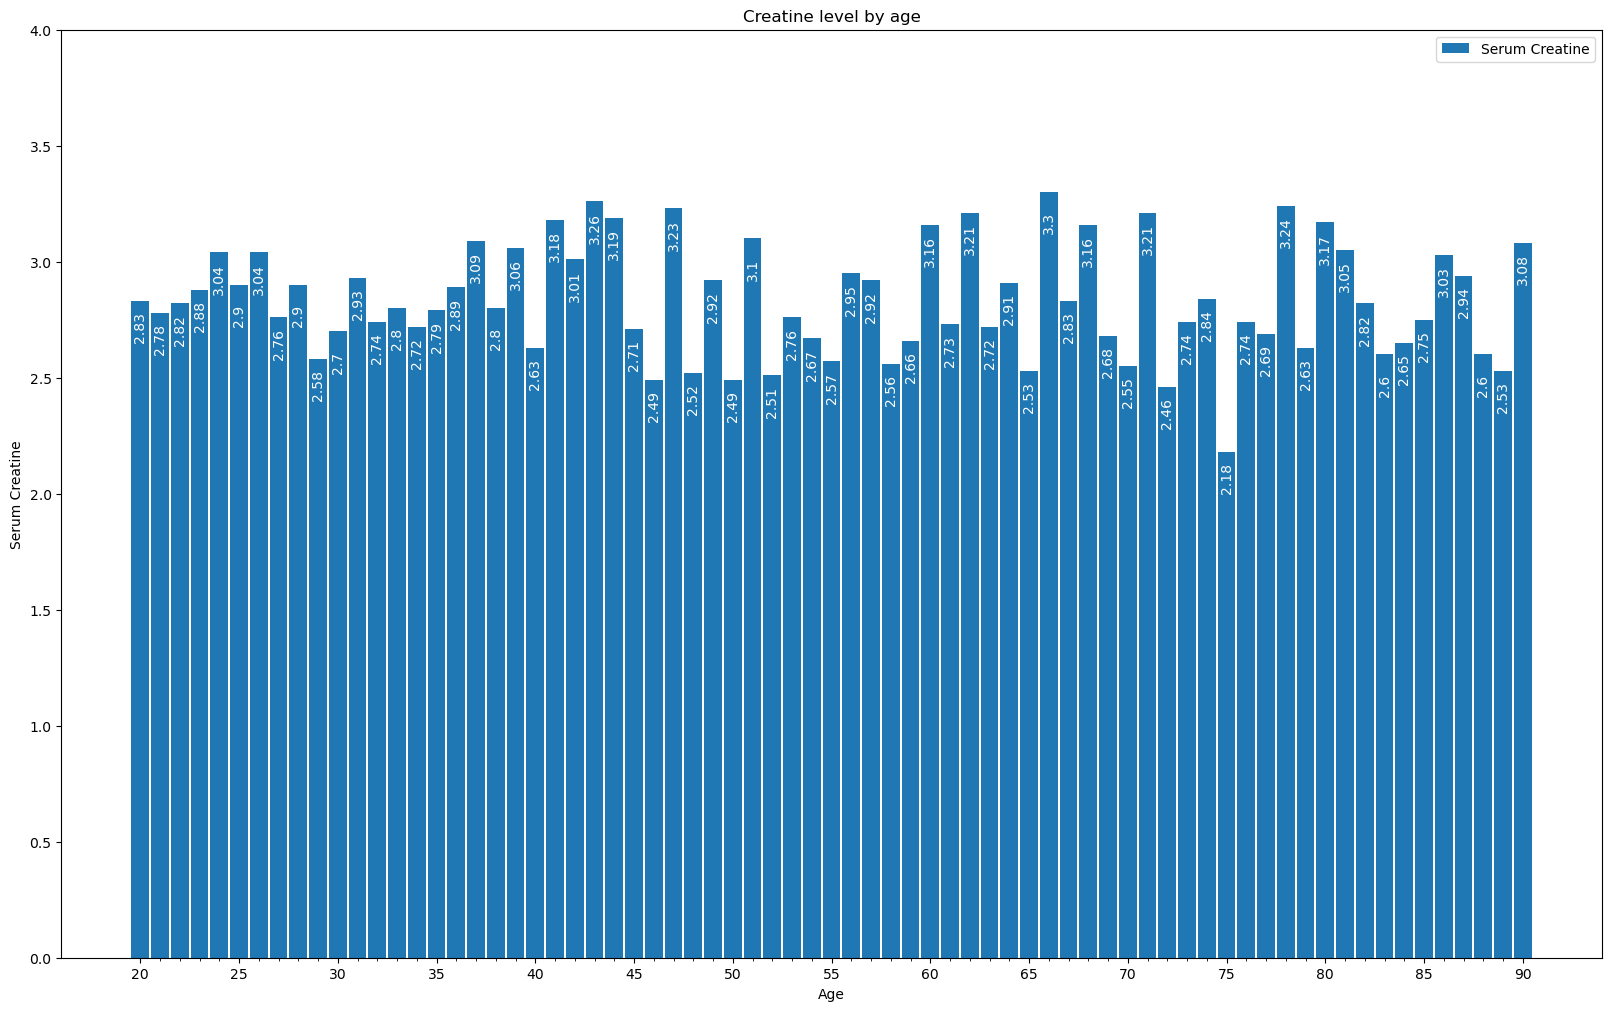

In [89]:
# sns.set_theme(style="whitegrid")
ax: Axes
fig, ax = plt.subplots(layout='constrained')

fig.set_size_inches(16, 10)

ax.set(ylim=(0,4))

creatine_bar = ax.bar(x=post_age_kidney_df.index, height=post_age_kidney_df["SerumCreatinine"].round(2),width=.9, label="Serum Creatine")
# creatine_bar_2 = ax.bar(x=post_kidney_df.index, height=post_kidney_df["SerumCreatinine"].round(2).min(),width=.9, label="Serum Creatine2")

ax.bar_label(creatine_bar, padding=-30,rotation=90, label_type="edge", color="white")

ax.set_title("Creatine level by age")
ax.set_xlabel("Age")
ax.set_ylabel("Serum Creatine")
ax.set_xticks(np.arange(20, 91, 5 ) )
ax.set_xticks(post_age_kidney_df.index, minor=True)

ax.legend(loc="upper right")

plt.show()

In [90]:
post_creatine_kidney_df.index

Index([0.5065924688113561, 0.5195583671342556, 0.5253029882211309,
       0.5303325361508022, 0.5320737627287953, 0.5340609535781388,
       0.5358225558451614, 0.5405031763868741, 0.5426750978076882,
       0.5461481722017368,
       ...
        4.972072084867047,  4.973084113164751,  4.977829471295412,
        4.982332049406859,  4.988301243438242,  4.988407880664902,
        4.992716817936556,  4.993008019577829,  4.994026494580761,
         4.99863744346581],
      dtype='float64', name='SerumCreatinine', length=1524)

### Creatine levels

<function matplotlib.pyplot.show(close=None, block=None)>

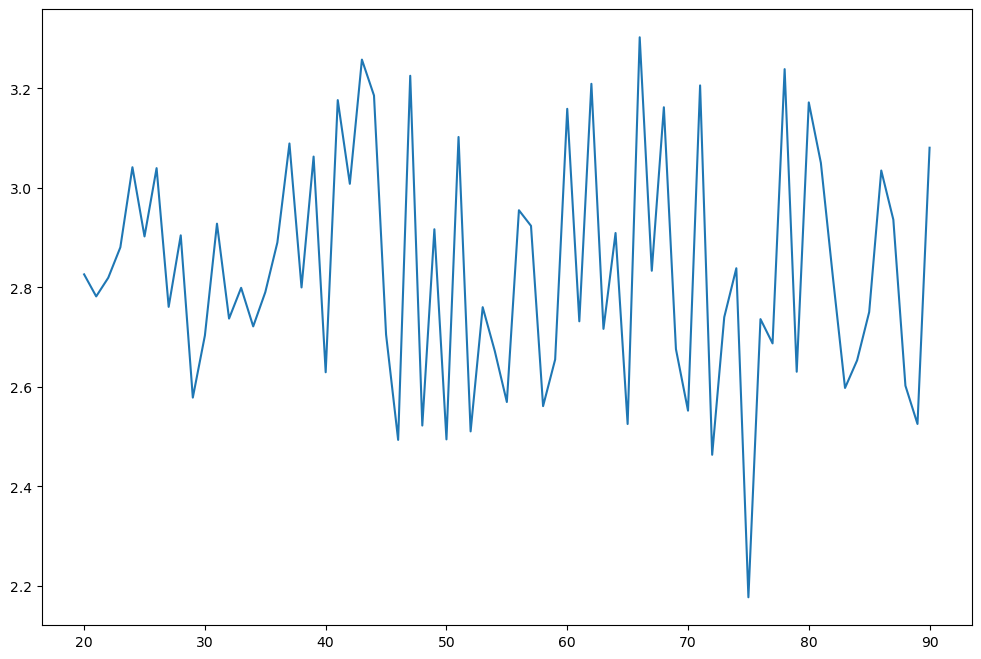

In [91]:

ax: Axes
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)


ax.plot(post_age_kidney_df.index, "SerumCreatinine", data=post_age_kidney_df)
plt.show



##### Re-encode gender

In [92]:

kidney_df["Gender_label"] =  kidney_df["Gender"].apply(lambda x: "Male" if x == 1 else "Female")


In [93]:
kidney_df["Gender_label"]

0       Female
1       Female
2         Male
3       Female
4       Female
         ...  
1654    Female
1655    Female
1656    Female
1657    Female
1658      Male
Name: Gender_label, Length: 1659, dtype: object

In [94]:
post_kidney_df.quantile(0.25)

PatientID                        401.750000
Age                               36.000000
Gender                             0.000000
Ethnicity                          0.000000
SocioeconomicStatus                0.000000
EducationLevel                     1.000000
BMI                               21.519680
Smoking                            0.000000
AlcoholConsumption                 4.946890
PhysicalActivity                   2.524380
DietQuality                        2.503027
SleepQuality                       5.503603
FamilyHistoryKidneyDisease         0.000000
FamilyHistoryHypertension          0.000000
FamilyHistoryDiabetes              0.000000
PreviousAcuteKidneyInjury          0.000000
UrinaryTractInfections             0.000000
SystolicBP                       113.000000
DiastolicBP                       75.000000
FastingBloodSugar                101.329789
HbA1c                              5.550466
SerumCreatinine                    1.749394
BUNLevels                       

#### Boxplot

##### Select columns

In [95]:

more_than_1_columns = ["Gender"] + [str(col_name) for col_name, col_value in post_kidney_df.quantile(0.50,numeric_only=True).items() if col_value > 1]
print( more_than_1_columns)
filtered_df(post_kidney_df,columns=more_than_1_columns)

['Gender', 'PatientID', 'Age', 'EducationLevel', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'NSAIDsUse', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy']


,Gender,PatientID,Age,EducationLevel,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,...,CholesterolTriglycerides,NSAIDsUse,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
0,0,1,71,2,31.069414,5.128112,1.676220,0.240386,4.076434,113,...,212.095215,4.563139,3.563894,6.992244,4.518513,7.556302,76.076800,1.018824,4.966808,9.871449
1,0,2,34,3,29.692119,18.609552,8.377574,6.503233,7.652813,120,...,255.451314,9.097002,5.327336,0.356290,2.202222,6.836766,40.128498,3.923538,8.189275,7.161765
2,1,3,80,1,37.394822,11.882429,9.607401,2.104828,4.392786,147,...,251.902583,3.851249,4.855420,4.674069,5.967271,2.144722,92.872842,1.429906,7.624028,7.354632
3,0,4,40,1,31.329680,16.020165,0.408871,6.964422,6.282274,117,...,392.338425,7.881765,8.531685,5.691455,2.176387,7.077188,90.080321,3.226416,3.282688,6.629587
4,0,5,43,2,23.726311,7.944146,0.780319,3.097796,4.021639,98,...,370.523877,4.179459,1.422320,2.273459,6.800993,3.553118,5.258372,0.285466,3.849498,1.437385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,0,1651,32,3,35.253136,4.841773,1.037494,2.522594,7.342041,118,...,301.330107,1.438618,0.628983,2.777281,3.159432,1.771158,65.378786,0.191474,2.812123,4.533731
1652,0,1653,20,3,20.378015,14.809062,7.459221,3.984925,5.517204,108,...,154.458984,6.836343,6.105582,0.924754,5.297866,5.813276,63.415192,0.447521,0.448998,9.833712
1653,1,1654,73,3,35.634449,8.929558,6.260773,6.338724,4.927645,162,...,332.450716,4.781656,7.651948,5.176332,2.956835,4.135998,72.032441,2.816752,4.974069,3.448310
1657,0,1658,90,2,24.964149,12.967462,0.618614,4.557577,5.527100,163,...,389.349914,9.994551,1.844736,4.151696,0.257814,3.432765,31.858023,0.560298,2.744519,0.322592


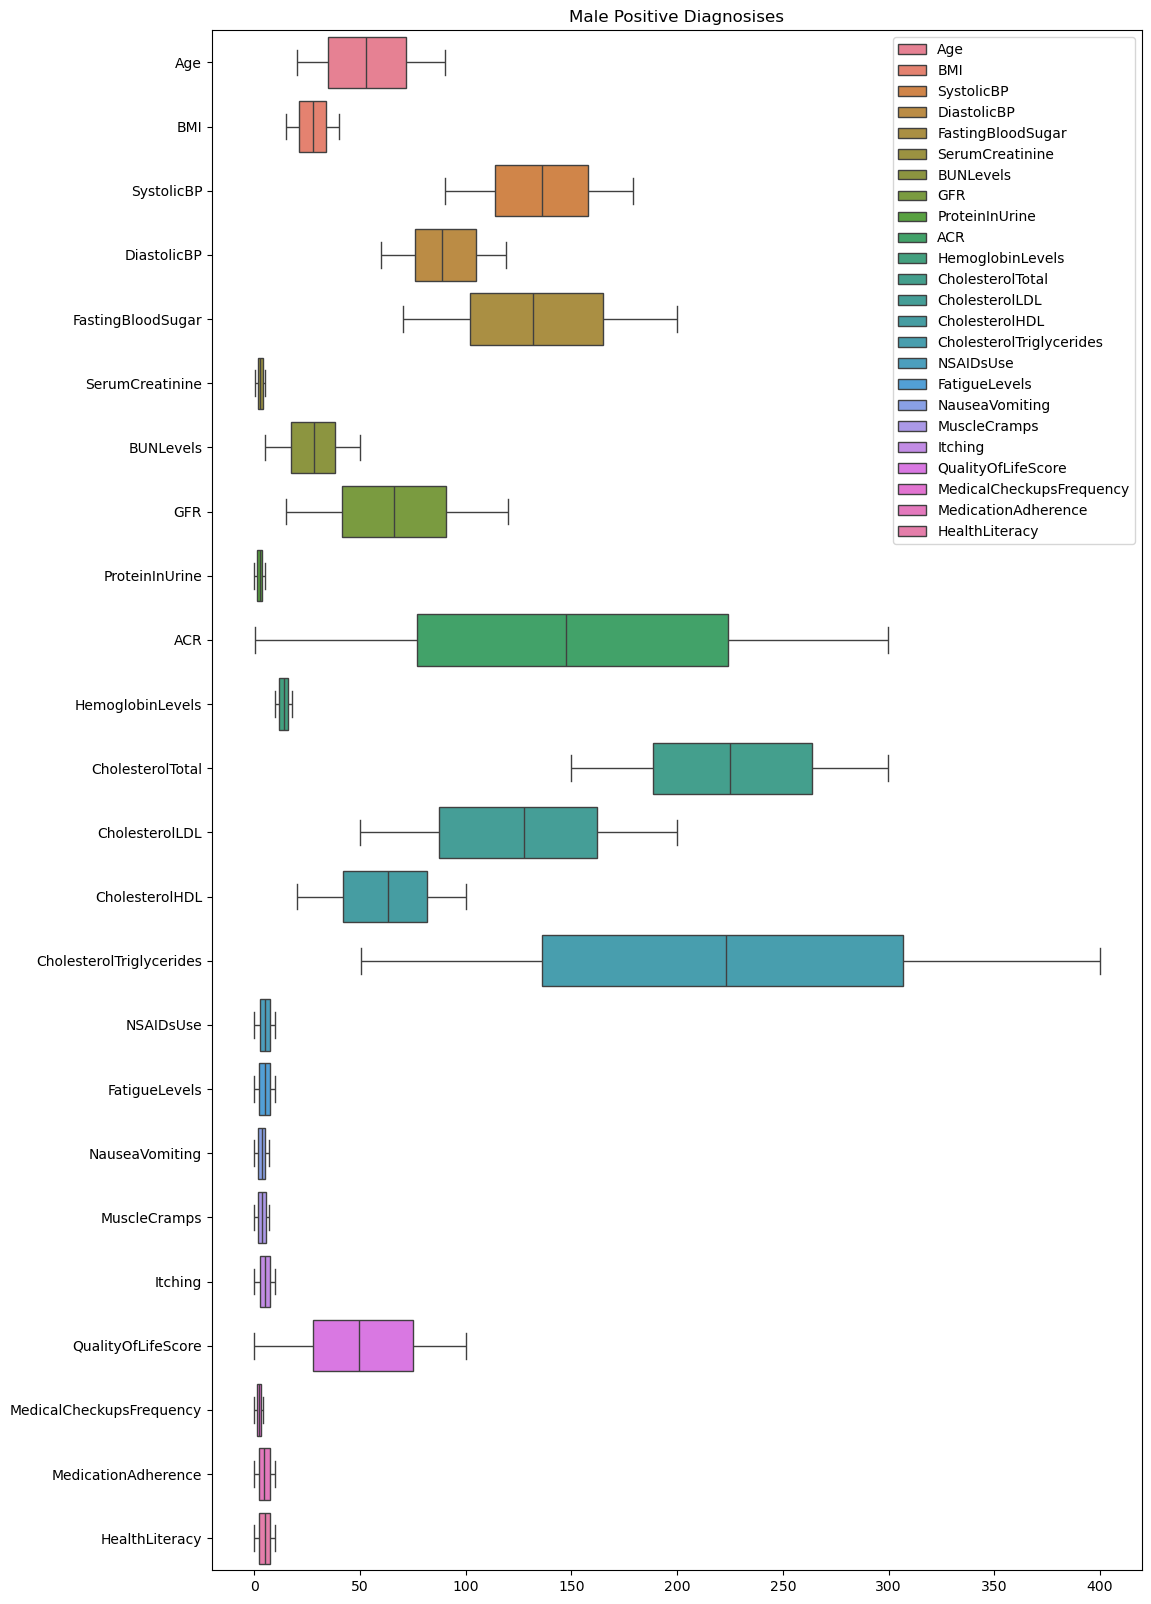

In [96]:
gender_boxplot_graph(filtered_df(post_kidney_df,columns=more_than_1_columns , rm_columns=["SleepQuality", 
                                                                                            "HbA1c",
                                                                                            'PatientID',
                                                                                            'SerumElectrolytesSodium', 
                                                                                            "SerumElectrolytesPotassium",
                                                                                            "SerumElectrolytesPhosphorus",
                                                                                            "SerumElectrolytesCalcium",
                                                                                            'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                                                                                            'EducationLevel',
                                                                                            ]),
                    "male",
                    title="Male Positive Diagnosises",
                    orient= "h",
                    legend=True,
                    )